In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you have a DataFrame `df` with columns 'SR' and 'Ave'
data = pd.read_csv("Cricket.csv",  sep=",", encoding="ISO-8859-1", header=0)


In [9]:
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [10]:
print(data.columns)


Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')


In [11]:
# Extract only the 'SR' and 'Ave' columns for clustering
data_for_clustering = data[['SR', 'Ave']]

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(scaled_data)

# Step 3: Assign clusters to players
data['Cluster'] = kmeans.labels_

# Check the cluster assignments for the first few players
print(data[['Player', 'SR', 'Ave', 'Cluster']])

# Optional: Check the cluster centers to understand each group
print("Cluster Centers:\n", kmeans.cluster_centers_)

                         Player     SR    Ave  Cluster
0          SR Tendulkar (INDIA)  86.23  44.83        2
1   KC Sangakkara (Asia/ICC/SL)  78.86  41.98        2
2          RT Ponting (AUS/ICC)  80.39  42.03        2
3       ST Jayasuriya (Asia/SL)  91.20  32.36        3
4    DPMD Jayawardene (Asia/SL)  78.96  33.37        1
..                          ...    ...    ...      ...
74            CG Greenidge (WI)  64.92  45.03        2
75          Misbah-ul-Haq (PAK)  73.75  43.40        2
76         PD Collingwood (ENG)  76.98  35.36        1
77              A Symonds (AUS)  92.44  39.75        2
78      Abdul Razzaq (Asia/PAK)  81.25  29.70        1

[79 rows x 4 columns]
Cluster Centers:
 [[ 0.94780641  2.14053252]
 [-0.60812495 -0.72215346]
 [ 0.00793051  0.43100218]
 [ 2.09261936 -1.08814854]]


In [21]:
data[data['Cluster'] == 2]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,2
5,Inzamam-ul-Haq (Asia/PAK),1991-2007,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,2
6,JH Kallis (Afr/ICC/SA),1996-2014,328,314,53,11579,139,44.36,15885,72.89,17,86,17,2
7,SC Ganguly (Asia/INDIA),1992-2007,311,300,23,11363,183,41.02,15416,73.70,22,72,16,2
9,BC Lara (ICC/WI),1990-2007,299,289,32,10405,169,40.48,13086,79.51,19,63,16,2
10,TM Dilshan (SL),1999-2016,330,303,41,10290,161*,39.27,11933,86.23,22,47,11,2
11,Mohammad Yousuf (Asia/PAK),1998-2010,288,273,40,9720,141*,41.71,12942,75.10,15,64,15,2
17,CH Gayle (ICC/WI),1999-2015,269,264,17,9221,215,37.33,10834,85.11,22,47,23,2


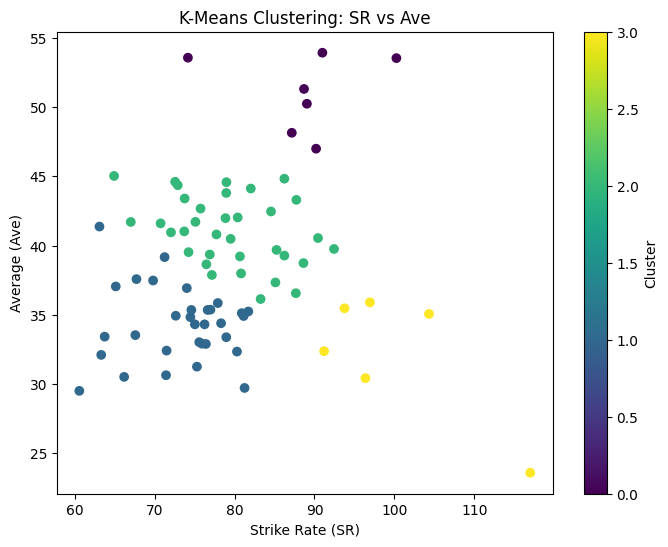

In [22]:
import matplotlib.pyplot as plt

# Scatter plot of SR vs Ave, color-coded by cluster
plt.figure(figsize=(8, 6))
plt.scatter(data['SR'], data['Ave'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Strike Rate (SR)')
plt.ylabel('Average (Ave)')
plt.title('K-Means Clustering: SR vs Ave')
plt.colorbar(label='Cluster')
plt.show()


In [23]:
print(f"Inertia (within-cluster sum of squares): {kmeans.inertia_}")


Inertia (within-cluster sum of squares): 51.41938015918699


In [24]:
from sklearn.metrics import silhouette_score

# Silhouette score
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.36737915537342536


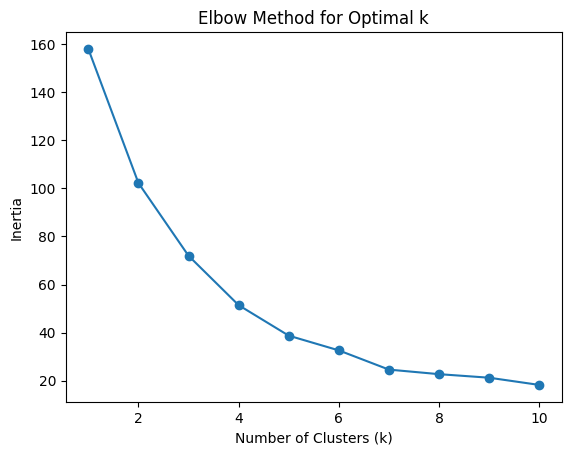

In [25]:
inertia_values = []
k_range = range(1, 11)  # Test for k=1 to k=10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [26]:
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[ 1.19255786  2.07062014]
 [-0.45942993 -0.78910813]
 [ 1.48250914 -0.50978244]
 [ 0.1610867  -0.69561903]
 [-0.77459872  1.30454718]
 [ 3.82311689 -2.5424233 ]
 [-0.20831707  0.26850393]
 [-1.11019526  0.18434188]
 [ 0.4851494   0.66950631]
 [-1.52290371 -1.14278302]]


In [27]:
# Check some sample players in each cluster
for cluster_num in range(4):  # You have 4 clusters
    print(f"\nPlayers in Cluster {cluster_num}:")
    cluster_players = data[data['Cluster'] == cluster_num]
    print(cluster_players[['Player', 'SR', 'Ave']].head())



Players in Cluster 0:
                     Player      SR    Ave
13    MS Dhoni (Asia/INDIA)   88.69  51.32
15  AB de Villiers (Afr/SA)  100.25  53.55
25          V Kohli (INDIA)   90.99  53.94
34             HM Amla (SA)   89.05  50.25
38           MG Bevan (AUS)   74.16  53.58

Players in Cluster 1:
                        Player     SR    Ave
4   DPMD Jayawardene (Asia/SL)  78.96  33.37
8    R Dravid (Asia/ICC/INDIA)  71.24  39.16
14        M Azharuddin (INDIA)  74.02  36.92
16            PA de Silva (SL)  81.13  34.90
21              DL Haynes (WI)  63.09  41.37

Players in Cluster 2:
                        Player     SR    Ave
0         SR Tendulkar (INDIA)  86.23  44.83
1  KC Sangakkara (Asia/ICC/SL)  78.86  41.98
2         RT Ponting (AUS/ICC)  80.39  42.03
5    Inzamam-ul-Haq (Asia/PAK)  74.24  39.52
6       JH Kallis (Afr/ICC/SA)  72.89  44.36

Players in Cluster 3:
                          Player      SR    Ave
3        ST Jayasuriya (Asia/SL)   91.20  32.36
12        AC G

In [28]:
kmeans = KMeans(n_clusters=4, random_state=100)
data['Cluster'] = kmeans.fit_predict(scaled_data)


In [29]:
# Print the cluster centers
print("Cluster Centers (SR, Ave):\n", kmeans.cluster_centers_)


Cluster Centers (SR, Ave):
 [[ 0.94780641  2.14053252]
 [-0.60812495 -0.72215346]
 [ 0.00793051  0.43100218]
 [ 2.09261936 -1.08814854]]


In [30]:
# Sorting the cluster centers based on SR and Ave values
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['SR', 'Ave'])
cluster_centers['Cluster'] = range(4)

# Sort clusters to assign the correct labels (A, B, C, D)
cluster_centers_sorted = cluster_centers.sort_values(by=['SR', 'Ave'], ascending=[False, False])

# Print the sorted centers
print(cluster_centers_sorted)


         SR       Ave  Cluster
3  2.092619 -1.088149        3
0  0.947806  2.140533        0
2  0.007931  0.431002        2
1 -0.608125 -0.722153        1


In [31]:
# Map clusters to desired labels
cluster_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Apply the new labels to the data
data['Cluster_Label'] = data['Cluster'].map(cluster_labels)

# Check the updated cluster assignments
print(data[['Player', 'SR', 'Ave', 'Cluster_Label']].head())


                        Player     SR    Ave Cluster_Label
0         SR Tendulkar (INDIA)  86.23  44.83             C
1  KC Sangakkara (Asia/ICC/SL)  78.86  41.98             C
2         RT Ponting (AUS/ICC)  80.39  42.03             C
3      ST Jayasuriya (Asia/SL)  91.20  32.36             D
4   DPMD Jayawardene (Asia/SL)  78.96  33.37             B


In [34]:
# List of substrings to search for in the Player column
specific_players = ['SR Tendulkar', 'Chris Gayle','Richards', 'R Dravid', 'MJ Guptill']

# Search for rows where the 'Player' column contains any of the substrings in the list
search_condition = data['Player'].str.contains('|'.join(specific_players), case=False, na=False)

# Print the results
print(data[search_condition][['Player', 'SR', 'Ave', 'Cluster_Label']])


                       Player     SR    Ave Cluster_Label
0        SR Tendulkar (INDIA)  86.23  44.83             C
8   R Dravid (Asia/ICC/INDIA)  71.24  39.16             B
42          IVA Richards (WI)  90.20  47.00             A
47         RB Richardson (WI)  63.74  33.41             B
63            MJ Guptill (NZ)  87.73  43.30             C


In [42]:
data[data["Cluster_Label"] == "A"]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster,Cluster_Label
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183*,51.32,10706,88.69,10,64,8,0,A
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162*,53.55,9295,100.25,24,53,7,0,A
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,0,A
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3,0,A
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108*,53.58,9320,74.16,6,46,5,0,A
42,IVA Richards (WI),1975-1991,187,167,24,6721,189*,47.00,7451,90.20,11,45,7,0,A
64,MEK Hussey (AUS),2004-2012,185,157,44,5442,109*,48.15,6243,87.16,3,39,3,0,A


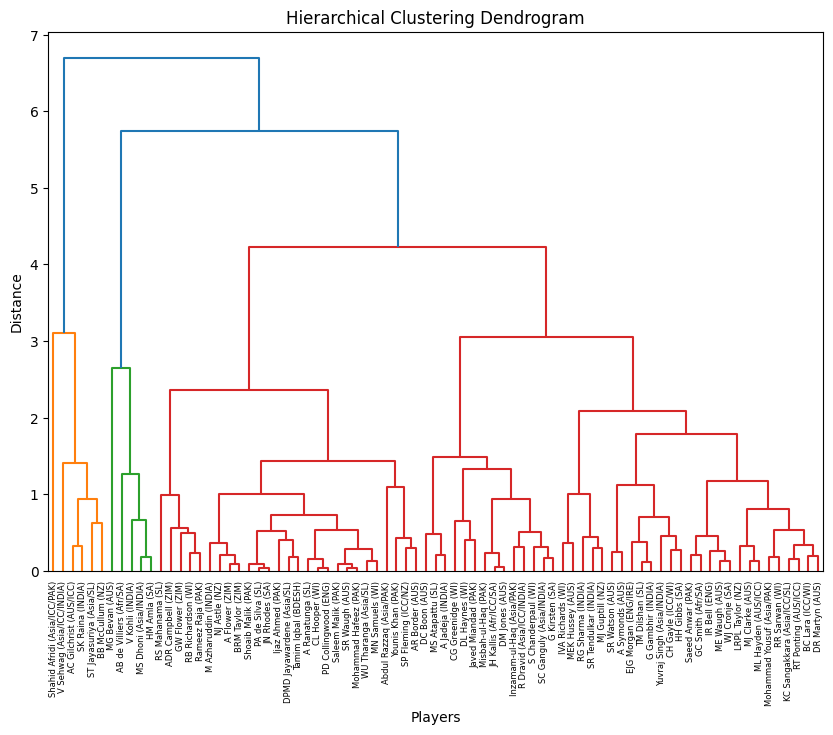

                       Player      SR    Ave  Cluster
0        SR Tendulkar (INDIA)   86.23  44.83        4
7     SC Ganguly (Asia/INDIA)   73.70  41.02        4
8   R Dravid (Asia/ICC/INDIA)   71.24  39.16        4
17          CH Gayle (ICC/WI)   85.11  37.33        4
24  V Sehwag (Asia/ICC/INDIA)  104.33  35.05        1
65          RG Sharma (INDIA)   84.56  42.46        4


In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Load the data (adjust file path as needed)
data = pd.read_csv("Cricket.csv", sep=",", encoding="ISO-8859-1", header=0)

# Select the relevant columns (SR and Ave)
data_selected = data[['SR', 'Ave']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Perform hierarchical clustering using complete linkage
Z = linkage(data_scaled, method='complete')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data['Player'].values, orientation='top')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Players')
plt.ylabel('Distance')
plt.show()

# Cut the tree at k = 4 to form clusters
clusters = fcluster(Z, 4, criterion='maxclust')

# Add the cluster labels to the data
data['Cluster'] = clusters

# Check the cluster assignments for specific players
specific_players = ['Virat Kohli', 'SR Tendulkar', 'CH Gayle', 'V Sehwag', 'SC Ganguly', 'R Dravid', 'RG Sharma']
cluster_check = data[data['Player'].str.contains('|'.join(specific_players), case=False)]

print(cluster_check[['Player', 'SR', 'Ave', 'Cluster']])